# Imports

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Main Script

In [3]:
# load scores and reshape (3 because of 3 time points)
early_pSTAT3_rmse = np.loadtxt('Data/early_pSTAT3_test_rmse.txt').reshape(-1,3)
late_pSTAT3_rmse = np.loadtxt('Data/late_pSTAT3_test_rmse.txt').reshape(-1,3)

# average scores across timepoints
early_pSTAT3_rmse = np.mean(early_pSTAT3_rmse,axis=1)
late_pSTAT3_rmse = np.mean(late_pSTAT3_rmse,axis=1)

# load cytokine specificty scores
# same gene order as early and late predictions
cyt_score_df = pd.read_csv('Data/cyt_spec_score.csv', header=0, index_col=0)

<Figure size 640x480 with 0 Axes>

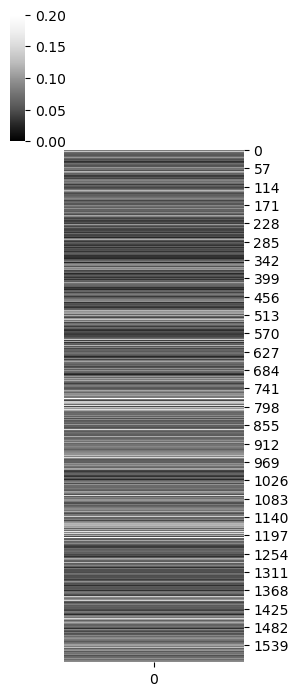

<Figure size 640x480 with 0 Axes>

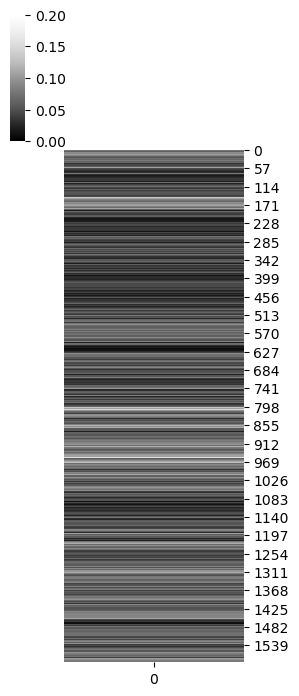

In [4]:
# plot score heatmaps - early
plt.figure()
sns.clustermap(early_pSTAT3_rmse,cmap='Greys_r',vmin=0,vmax=0.2,col_cluster=False,row_cluster=False,figsize=(3,7))
plt.show()

# plot score heatmaps - late
plt.figure()
sns.clustermap(late_pSTAT3_rmse,cmap='Greys_r',vmin=0,vmax=0.2,col_cluster=False,row_cluster=False,figsize=(3,7))
plt.show()

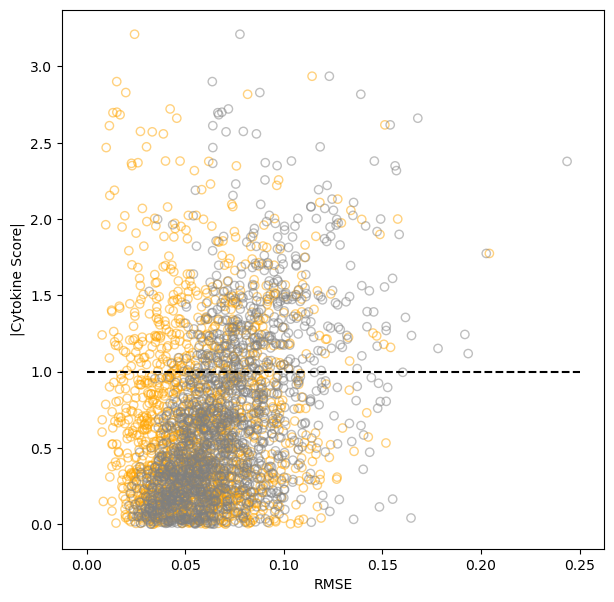

In [5]:
# scatter plot
plt.figure(figsize=(7,7))
plt.scatter(late_pSTAT3_rmse,cyt_score_df.abs(),facecolors="None",edgecolor='orange',alpha=0.5)
plt.scatter(early_pSTAT3_rmse,cyt_score_df.abs(),facecolors="None",edgecolor='gray',alpha=0.5)
plt.plot([0,0.25],[1,1],'--',color='black')
plt.xlabel('RMSE')
plt.ylabel('|Cytokine Score|')
plt.show()

/Users/neha/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


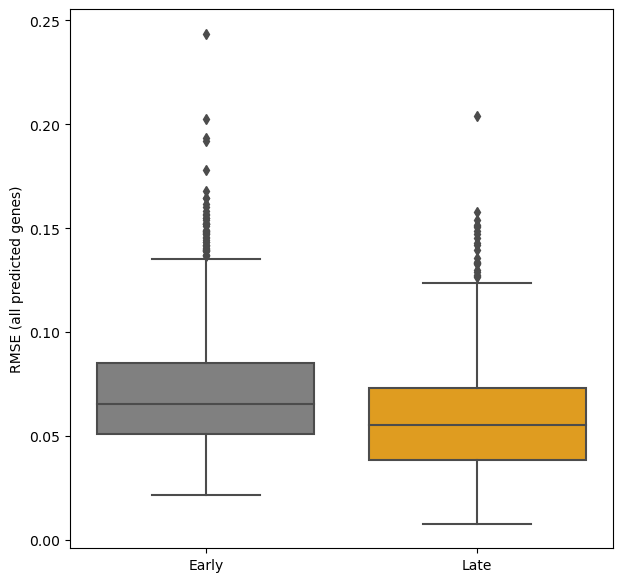

/Users/neha/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


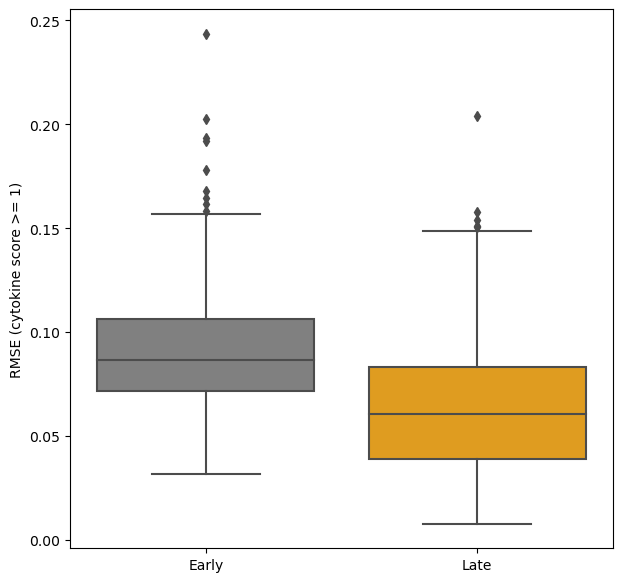

In [7]:
# make boxplot comparing early vs. late predictions
# all cytokine scores
# boxplot
box_data_df = pd.DataFrame(np.column_stack((early_pSTAT3_rmse,late_pSTAT3_rmse)))
box_data_df.columns = ['Early','Late']

col_pal = {"Early": "gray", "Late": "orange"}

plt.figure(figsize=(7,7))
sns.boxplot(data=box_data_df,palette=col_pal)
plt.ylabel('RMSE (all predicted genes)')
plt.show()

# cytokine scores >= 1 only
ind = np.where(cyt_score_df.abs() >= 1)[0]

# boxplot
box_data_df = pd.DataFrame(np.column_stack((early_pSTAT3_rmse[ind],late_pSTAT3_rmse[ind])))
box_data_df.columns = ['Early','Late']

col_pal = {"Early": "gray", "Late": "orange"}

plt.figure(figsize=(7,7))
sns.boxplot(data=box_data_df,palette=col_pal)
plt.ylabel('RMSE (cytokine score >= 1)')
plt.show()